In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
import re
import os
import glob
import cv2

In [3]:
tensorflow.__version__


'1.2.1'

In [3]:
DATASET_LOCATION = "../../MLData/EnglishHnd/EnglishHnd/English/Hnd/Img/"

In [4]:
img_height = 56
img_width = 28

image_size_flat = img_height*img_width

img_shape = (img_height,img_width)

num_channel = 1# for Gray scale

num_classes = 62 # for 

In [5]:
def create_argmax(folder_name):
    index = int(re.search("Sample(.*)", folder_name).group(1)) - 1
    arr = np.zeros(num_classes)
    arr[index] = 1
    return arr

In [59]:
def cvt_img2np(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (28,28))
    return img

In [47]:
def cvt_img2np2(path):
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).reshape((28,28))

In [27]:
create_argmax("Sample006")

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [57]:
def get_dataset():
    DATASET_LOCATION = "../../MLData/EnglishHnd/EnglishHnd/English/Hnd/Img"
    hcr = {"data":[], "labels":[], "char":[]}
    for folder in glob.glob(DATASET_LOCATION + "/*"):
        if os.path.isdir(folder):
            for img_path in glob.glob(folder + '/*.png'):
                hcr.get('data').append(cvt_img2np(img_path))
                hcr.get("labels").append(create_argmax(folder))
                hcr.get("char").append(int(folder[-3:]) - 1)
    print("read completed")
    return hcr

In [77]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == 9 and len(cls_true) == 9
    
    fig, axes = plt.subplots(3,3,figsize=(10,10))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        
        ax.imshow(images[i], cmap="binary")
        if cls_pred is None:
            xlabel = "True {0}".format(cls_true[i])
        else:
            xlabel = "True {0}, Pred {1}".format(cls_true[i], cls_pred[i])
    
        ax.set_xlabel(xlabel)
    
        ax.set_xticks([])
        ax.set_yticks([])

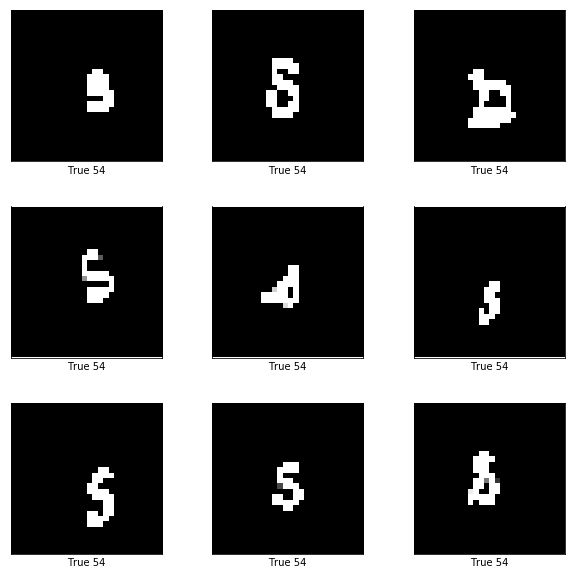

In [79]:
images = hcr.get("data")[3000:3009]
cls_true = hcr.get("char")[3000:3009]

plot_images(images=images, cls_true=cls_true)

In [60]:
hcr = get_dataset()

read completed


In [61]:
hcr["data"][1]

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [25

In [74]:
np.random.permutation(100)

array([67, 65,  8, 93, 59,  7, 77, 43,  2, 20, 42, 34, 21, 19, 46, 15,  6,
        4, 60,  9, 74, 31, 81, 11, 97, 13, 69,  0, 47, 55, 87, 37, 44, 90,
       33, 75, 40, 23, 61, 92, 56, 64, 22, 66, 51, 79, 96, 88, 52, 16, 54,
       10, 28,  1, 85, 82, 89, 72, 30, 68, 58, 49, 12, 53, 32, 48, 86, 70,
       91, 17, 14, 62, 78, 73, 71, 27, 57,  3, 38, 45, 99, 76, 18, 26, 36,
       63, 80, 98, 84,  5, 24, 41, 95, 39, 25, 83, 29, 50, 35, 94])